# Plot Comparison Between Algorithms

In [90]:
%matplotlib notebook

import os
import matplotlib.pyplot as plt
import numpy as np

%reload_ext autoreload
%autoreload 2

We need to read the CSV files (from a function in another file) to get the reward at each timestep for each run of each algorithm. Only the `algorithms_to_plot` will be loaded.

In [93]:
algorithms_to_plot = ['esarsa', 'example']
basepath = '../data/'

data = {}
from load import load_data
for alg in os.listdir(basepath):
    if alg in algorithms_to_plot:
        data[str(alg)] = load_data(basepath+alg)

print('Data will be plotted for', ','.join([k for k in data.keys()]))

Data will be plotted for example,esarsa


Next, we calculates the mean and median performance across multiple runs (with 95% confidence interval and best/worst runs).

<IPython.core.display.Javascript object>


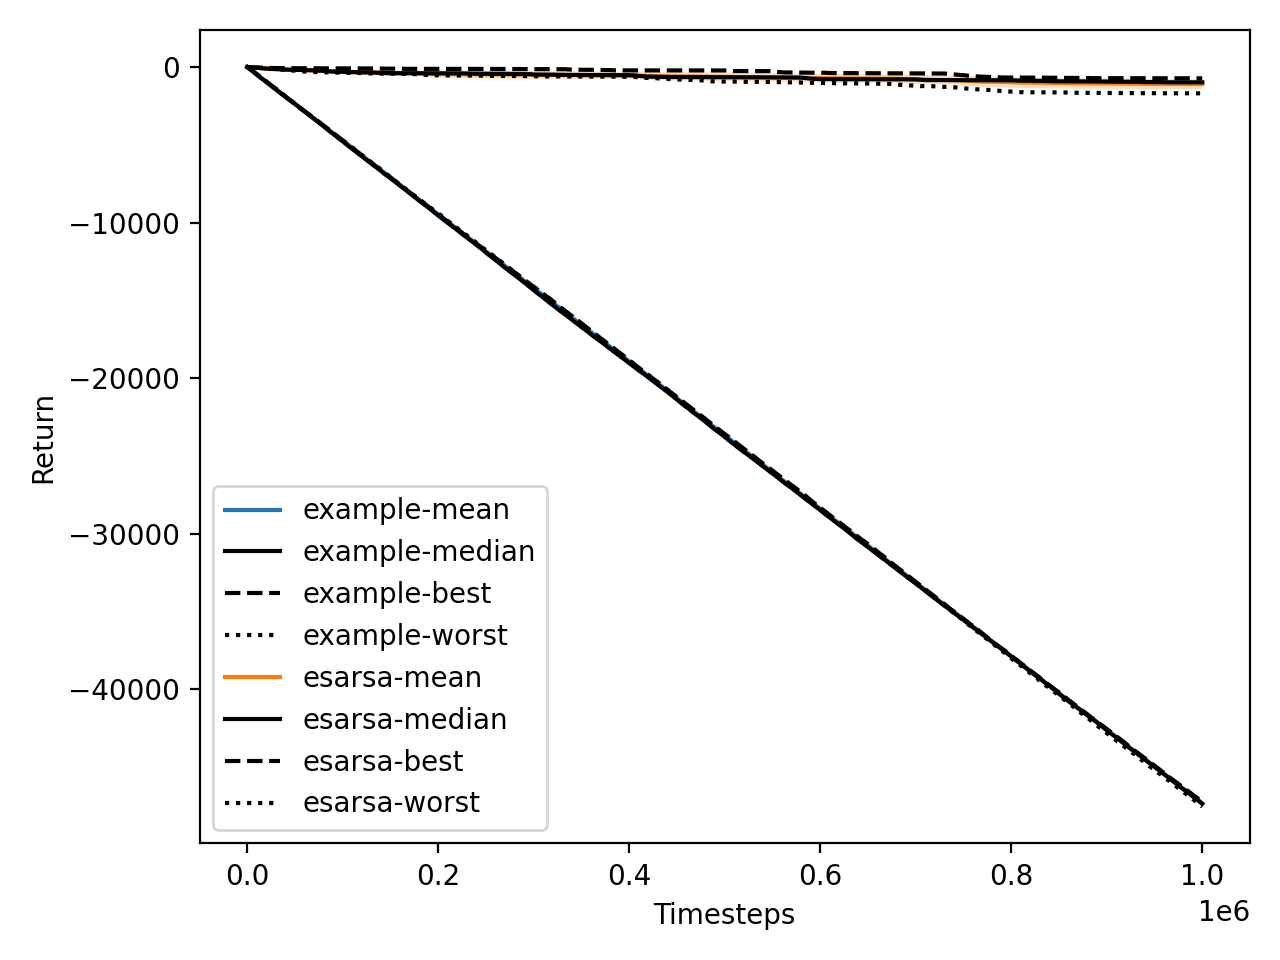

In [94]:
from stats import getMeanAndCI95, getMedianBestWorstFinal

for alg, returns_list_files in data.items():
    mean_returns_list, min_CI95_returns_list, max_CI95_returns_list = getMeanAndCI95(returns_list_files)
    
    lenrun = len(mean_returns_list)
    xaxis = np.array([i for i in range(1,lenrun+1)])
    
    plt.plot(xaxis, mean_returns_list, label=str(alg)+'-mean')
    plt.fill_between(xaxis, min_CI95_returns_list, max_CI95_returns_list, alpha=0.25);
    
    # Calculates the median run based on final performance
    median_returns_list, best_returns_list, worst_returns_list = getMedianBestWorstFinal(returns_list_files)
    plt.plot(xaxis, median_returns_list, label=str(alg)+'-median', color='black')
    plt.plot(xaxis, best_returns_list, label=str(alg)+'-best', color='black', linestyle ='--')
    plt.plot(xaxis, worst_returns_list, label=str(alg)+'-worst', color='black', linestyle = ':')


plt.xlabel('Timesteps')
plt.ylabel('Return')
plt.legend(loc=0)
plt.yticks()
plt.xticks()
plt.tight_layout()